<a href="https://colab.research.google.com/github/jackhegarty3/Data110-Fall2025/blob/main/Data110_JackHegarty_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The dataset I chose to examine is the complete batting statistics provided by Baseball Reference for the 2025 Boston Red Sox, a team in Major League Baseball. I chose this dataset because as an avid fan of the team, I watched approximately 75% of their 165 games this season, and I wanted to see how the numbers compared to the product I saw on the field. The dataset contains a slew of offensive statistics, from the basic counts of Hits, Home Runs, and Plate Appearances to the advanced calculations of OPS+ and WAR. The central statistic I will be focusing on is OPS+, an offensive summary statistic that combines On Base Percentage and Slugging Percentage, accounts for external conditions like ballpark dimensions, then adjusts so a score of 100 is league average, and a score of 150 is 50% better than league average.

[Dataset Source](https://www.baseball-reference.com/teams/BOS/2025.shtml)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/RedSox.csv')
df = df.drop(df.index[-1])
df = df.drop('Rk', axis=1)
df.head(20)

,Player,Age,Pos,WAR,G,PA,AB,R,H,2B,...,OPS,OPS+,rOBA,Rbat+,TB,GIDP,HBP,SH,SF,IBB
0,Carlos Narváez,26.0,C,2.8,118,446,403,51,97,27,...,0.726,100.0,0.311,97.0,169,12,1,2,2,0
1,Abraham Toro#,28.0,1B,-0.2,77,284,259,33,62,13,...,0.659,83.0,0.299,88.0,96,1,6,0,5,1
2,Kristian Campbell,23.0,2B,-1.0,67,263,229,24,51,10,...,0.664,86.0,0.299,88.0,79,1,4,0,1,0
3,Trevor Story,32.0,SS,3.8,157,654,612,91,161,29,...,0.741,104.0,0.333,105.0,265,3,7,1,1,1
4,Alex Bregman,31.0,3B,3.5,114,495,433,64,118,28,...,0.821,128.0,0.357,130.0,200,12,9,0,2,3
5,Jarren Duran*,28.0,LF,4.6,157,696,620,86,159,41,...,0.774,114.0,0.345,118.0,274,6,12,1,3,1
6,Ceddanne Rafaela,24.0,CF,4.8,156,587,546,84,136,34,...,0.708,95.0,0.309,92.0,226,9,8,3,2,0
7,Wilyer Abreu*,26.0,RF,3.2,115,417,373,53,92,17,...,0.786,116.0,0.332,112.0,175,8,0,1,3,5
8,Rafael Devers*,28.0,DH,2.3,73,334,272,47,74,18,...,0.905,151.0,0.387,153.0,137,7,4,0,2,7
9,Romy González,28.0,IF,2.0,96,341,315,47,96,23,...,0.826,128.0,0.363,137.0,152,8,3,0,5,1


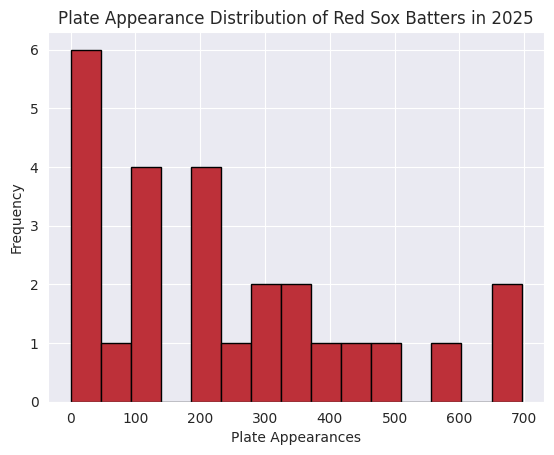

In [ ]:
sns.set_style("darkgrid")
sns.set_color_codes(palette='deep')
plt.hist(df['PA'], bins=15, color= '#BD3039', edgecolor='black')
plt.title('Plate Appearance Distribution of Red Sox Batters in 2025')
plt.xlabel('Plate Appearances')
plt.ylabel('Frequency')
plt.show()


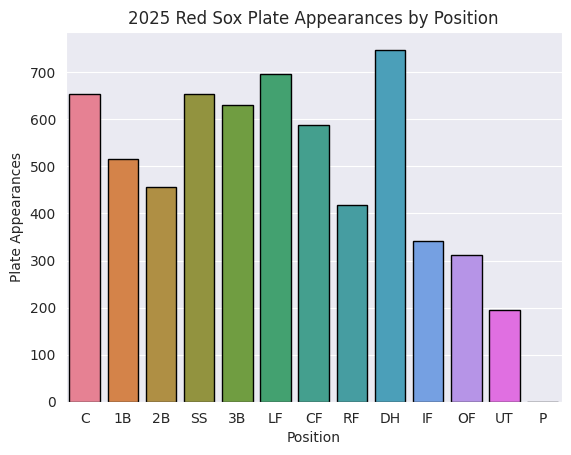

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x='Pos', y='PA', data=df, hue='Pos', estimator="sum", errorbar=None, edgecolor='black')
plt.title('2025 Red Sox Plate Appearances by Position')
plt.xlabel('Position')
plt.ylabel('Plate Appearances')
plt.show()

## Exploratory Data Analysis

First, I want to make sure all players included in this dataset are significant contributers to the Red Sox. Players with extremely low plate appearances may have abnormal statistics that could unfairly impact the data. The first histogram shows the distribution of all players that batted for the Red Sox in 2025, sorted by their amount of plate appearances. There are six players who were not regular contributers, batting fewer than 20 times while the next least frequent batter (Nate Eaton) batted 90 times. All players with fewer plate appearances than Nate Eaton will be removed from the dataset.

Next, the position groups need to be simplified for the sake of consistency. The second histogram shows the distribution of Red Sox players by their listed position. Some players are listed at one of the 10 positions, but others are simply labeled as "IF" (infield), "OF" (outfield), or "UT" (utility). This makes categorizing players confusing and drawing conclusions based on position impossible. I will add a variable named "PosGrp" that categorizes each player into three groups: infield, outfield, and DH (designated hitter).

In [ ]:
df = df[df['PA'] >= 90]

df.loc[(df['Pos'] == 'C') | (df['Pos'] == '1B') | (df['Pos'] == '2B') | (df['Pos'] == '3B') | (df['Pos'] == 'SS') | (df['Pos'] == 'IF'), 'PosGrp'] = 'Infield'
df.loc[(df['Pos'] == 'LF') | (df['Pos'] == 'CF') | (df['Pos'] == 'RF') | (df['Pos'] == 'OF'), 'PosGrp'] = 'Outfield'
df.loc[df['Pos'] == 'DH', 'PosGrp'] = 'DH'
df.loc[df['Player'] == 'Nick Sogard#', 'PosGrp'] = 'Infield'
df.loc[df['Player'] == 'Nate Eaton', 'PosGrp'] = 'Outfield'

pos_df = df[['Player', 'PosGrp']]
print(pos_df)

               Player    PosGrp
0      Carlos Narváez   Infield
1       Abraham Toro#   Infield
2   Kristian Campbell   Infield
3        Trevor Story   Infield
4        Alex Bregman   Infield
5       Jarren Duran*  Outfield
6    Ceddanne Rafaela  Outfield
7       Wilyer Abreu*  Outfield
8      Rafael Devers*        DH
9       Romy González   Infield
10     Roman Anthony*  Outfield
11      Rob Refsnyder        DH
12  Masataka Yoshida*        DH
13    David Hamilton*   Infield
14        Connor Wong   Infield
15     Marcelo Mayer*   Infield
16    Nathaniel Lowe*   Infield
17     Triston Casas*   Infield
18       Nick Sogard#   Infield
19         Nate Eaton  Outfield


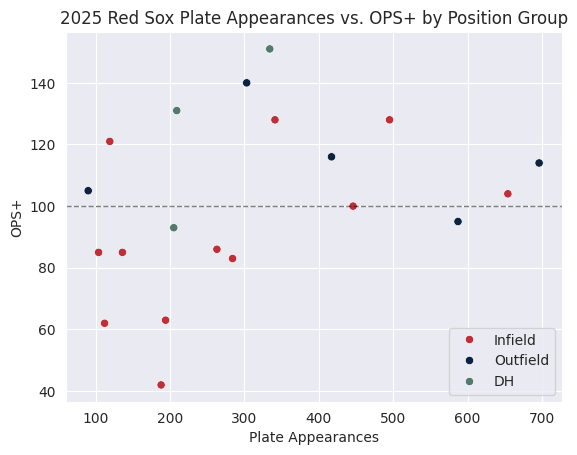

In [ ]:
colors={"Infield": "#BD3039", "Outfield": "#0C2340", "DH": "#54796d"}
sns.scatterplot(data=df, x="PA", y="OPS+", hue="PosGrp", palette=colors)
plt.legend(loc='lower right')
plt.axhline(y=100, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.title('2025 Red Sox Plate Appearances vs. OPS+ by Position Group')
plt.xlabel('Plate Appearances')
plt.ylabel('OPS+')
plt.show()

## Exploratory Data Analysis cont.

The above scatterplot is a basic summary graph that plots OPS+ by total plate appearances while showing which position group the player is in, with a dashed line representing league average.

My first takeaway is that the oufielders appear to have had a much better season at the plate than the infielders. It's difficult not to notice the cluster of infielders in the lower left corner of the plot with below average OPS+ scores and limited plate appearances. This makes sense, as the Red Sox lost key infielders early in the season to injury and experimented with a variety of replacement options before finding a solution. This led to below average hitters like Abraham Toro and David Hamilton getting extended playing time.

I also noticed that the players with the highest OPS+ scores don't have the highest number of plate appearances, which contrasts the logical assumption that the manager should play those players the most. An outside observer may assume that this is due to players regressing to league average as they accrue more appearances, but that conclusion lacks context. The player with the highest OPS+ on the team, Rafael Devers, was the star and face of the franchise until ownership became frustrated with his behavior and traded him early in the season. The player with the second highest OPS+, phenom Roman Anthony, got a late start as he spent the first half of the season in the minor leagues and later missed time due to injury. As always, data requires context to be useful.

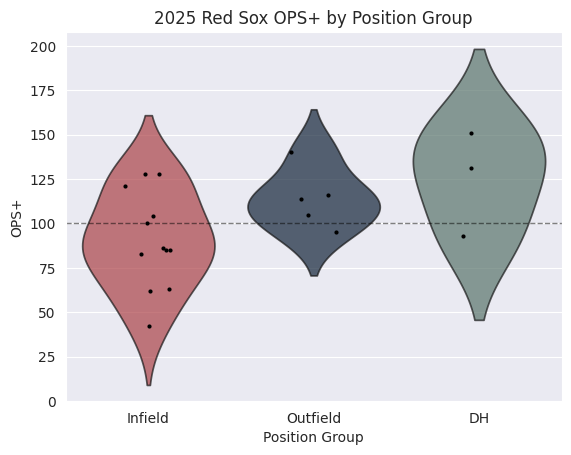

In [ ]:
sns.violinplot(x='PosGrp', y='OPS+', hue='PosGrp', data=df, inner=None, palette=colors, legend = False, alpha=0.7)
sns.stripplot(x='PosGrp', y='OPS+', data=df, jitter=0.15, size=3, color='black')
plt.title('2025 Red Sox OPS+ by Position Group')
plt.axhline(y=100, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('Position Group')
plt.ylabel('OPS+')
plt.show()

## Visualization 1

This violin plot displays the approximate distribution of OPS+ scores sorted by position group. The overlaid strip plot provides context, as the sample sizes for all groups are not large enough to draw solid conclusions. The dashed line represents league average OPS+, so as to show the relative success of each position group. The designated hitters predictably have the highest scores, as their job is solely to hit, but as noticed on the summary plot, the revolving door of subpar infielders led their group to perform the poorest.

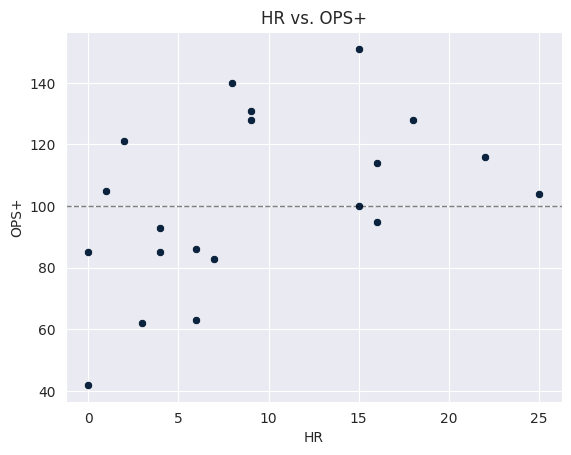

In [ ]:
sns.scatterplot(data=df, x="HR", y="OPS+", color="#0C2340")
plt.title('2025 Red Sox HR vs. OPS+')
plt.axhline(y=100, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('HR')
plt.ylabel('OPS+')
plt.show()

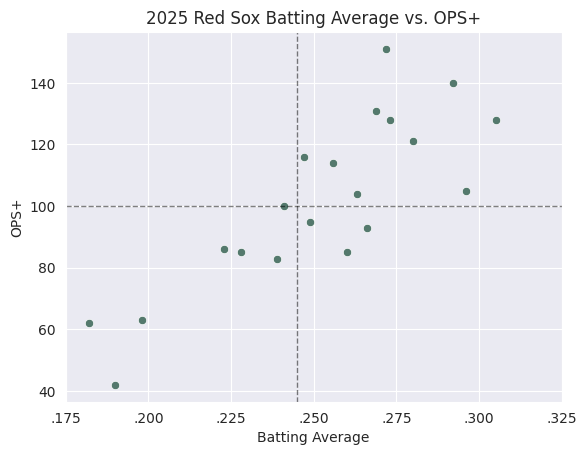

In [ ]:
sns.scatterplot(data=df, x="BA", y="OPS+", color="#54796d")
plt.title('2025 Red Sox Batting Average vs. OPS+')
plt.axvline(x=.245, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.axhline(y=100, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.xticks([0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325], ['.175', '.200', '.225', '.250', '.275', '.300', '.325'])
plt.xlabel('Batting Average')
plt.ylabel('OPS+')
plt.show()

## Visualization 2

These two scatter plots show the relationship between OPS+ and Home Runs, and OPS+ and Batting Average. They are relatively simple plots with dashed lines for league averages in OPS+ and Batting Average. Home Runs and Batting Average are two of the the most basic batting statistics, and I wanted to see if either of them had a significant relationship with an advanced statistic like OPS+.

Home Runs doesn't seem to have a strong relationship with OPS+, as displayed by Trevor Story and Nate Eaton. They have nearly identical OPS+ scores, even though Story hit 25 home runs and Eaton only hit one. Batting Average has a much stronger correlation, however. The six Red Sox players with the highest OPS+ scores also had six of the top seven batting averages. These plots would suggest that hitting for average impacts overall batting metrics more than the long ball on its own.

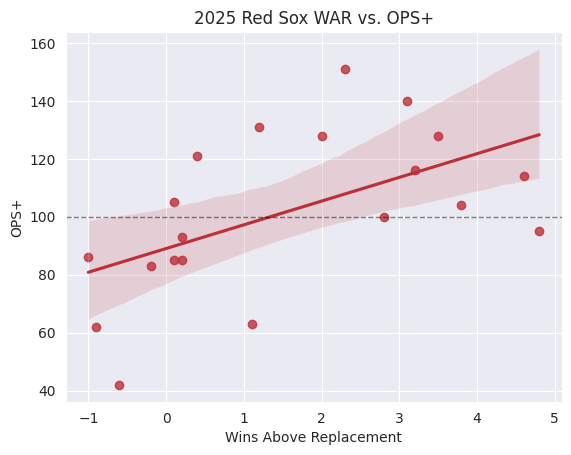

In [ ]:
plt.title('2025 Red Sox WAR vs. OPS+')
sns.regplot(data=df, x="WAR", y="OPS+", color="#BD3039")
plt.axhline(y=100, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('Wins Above Replacement')
plt.ylabel('OPS+')
plt.show()

## Visualization 3

The final plot shows the relationship between OPS+ and the main summary statistic used in baseball today, Wins Above Replacement (WAR). WAR attempts to fully summarize a player's contribution toward winning by evaluating all facets of their game, not just batting. WAR estimates how many wins a player personally added to their team compared to if their team had an average, replacement level player at their specific position instead. I used another basic scatterplot, but this time with a regression line to show the correlation between the two statistics.

The relationship shown in the plot is not nearly as strong as the relationship between OPS+ and BA. Players who bat well also tend to have higher WARs, but winning contributions come from all over the field, not just at the plate. Ceddanne Rafaela had the highest WAR of any Red Sox batter in 2025, but had an OPS+ score lower than league average. This is likely due to Rafaela's astounding defense, leading many to consider him the best defensive center fielder in baseball.

## Conclusion

This exploration of the 2025 Boston Red Sox OPS+ statistics reveals several insights into the team's offensive performance and how individual contributions shaped their season. After filtering out players with minimal plate appearances and organizing the roster into consistent positional groups, distinct trends emerged. Outfielders generally outperformed infielders at the plate, which aligns with the team's midseason instability in the infield following injuries and roster experimentation. Designated hitters, as expected, produced the highest offensive output, while the infield group lagged below league average in OPS+.

A closer examination of playing time versus production highlighted that high OPS+ values did not always correspond with high plate appearances, emphasizing the importance of contextual factors like trades and injuries. When investigating traditional statistics, batting average showed a much stronger relationship with OPS+ than home runs did, suggesting that consistent hitting contributed more to offensive success than power alone. Finally, comparing OPS+ with WAR demonstrated only a moderate correlation, reaffirming that while strong offensive performance boosts a player's overall value, defensive excellence can also drive high WAR totals.

In future research, I would like to explore how OPS+ and WAR relate to and predict team success across the entire league.